# 🏎️ Análise de Voltas Rápidas - Temporada 2024

📍 *Notebook 04: Análise de Voltas Rápidas*

Neste notebook, vamos analisar as **voltas rápidas** da temporada 2024, identificando quais pilotos conseguiram registrar os melhores tempos de volta em cada corrida.

Serão realizadas as seguintes etapas:
1. Importar os dados das corridas e dos resultados das voltas rápidas.
2. Juntar os dados de voltas rápidas com as informações de pilotos e equipes.
3. Analisar os pilotos com mais voltas rápidas e a frequência com que conseguiram esse feito.
4. Visualizar as informações de voltas rápidas com gráficos.

Essa análise é interessante porque nos mostra quais pilotos têm o ritmo mais forte e a capacidade de superar as condições de pista para estabelecer a volta mais rápida.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Estilo dos gráficos 

In [2]:
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 2. Lendo os dados de resultados das voltas rápidas e de pilotos

In [6]:
sprint_results_2024 = pd.read_csv('../data_filtrada/sprint_results_2024.csv')
lap_times_2024 = pd.read_csv('../data_filtrada/lap_times_2024.csv')
drivers = pd.read_csv('../data/drivers.csv')
constructors = pd.read_csv('../data/constructors.csv')
races_2024 = pd.read_csv('../data_filtrada/races_2024.csv')

# 3. Preparando os dados

In [8]:
# Encontrar a volta mais rápida de cada corrida
voltas_mais_rapidas = lap_times_2024.loc[lap_times_2024.groupby('raceId')['milliseconds'].idxmin()]

# Juntar com os dados de pilotos
voltas_rapidas_completas = voltas_mais_rapidas.merge(drivers, on='driverId', how='left')

# Juntar com os dados das corridas
voltas_rapidas_completas = voltas_rapidas_completas.merge(races_2024, on='raceId', how='left')

# 4. Analisando as voltas rápidas

In [9]:
# Contando o número de voltas por piloto 
voltas_rapidas_por_piloto = voltas_rapidas_completas['surname'].value_counts().reset_index()
voltas_rapidas_por_piloto.columns = ['Piloto', 'Voltas rápidas']

# Os 10 primeiros com voltas mais rápidas
voltas_rapidas_por_piloto.head(10)


,Piloto,Voltas rápidas
0,Norris,6
1,Verstappen,3
2,Leclerc,3
3,Alonso,2
4,Hamilton,2
5,Russell,2
6,Piastri,1
7,Sainz,1
8,Pérez,1
9,Ricciardo,1


C:\Users\nicol\AppData\Local\Temp\ipykernel_25536\184128019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=voltas_rapidas_por_piloto, x='Voltas rápidas', y='Piloto', palette='Blues_d')


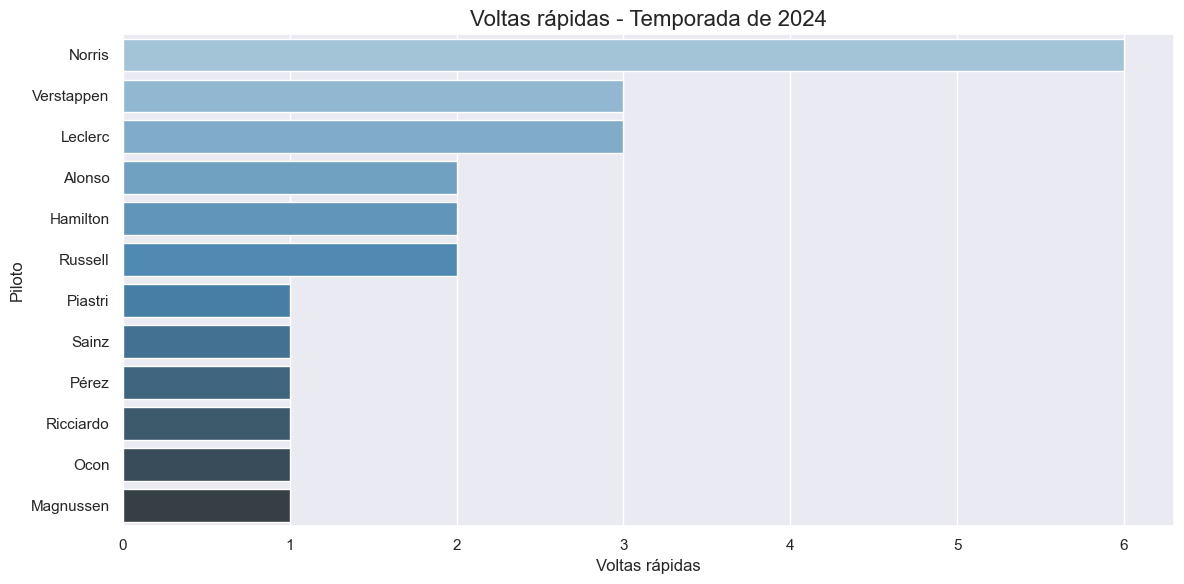

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=voltas_rapidas_por_piloto, x='Voltas rápidas', y='Piloto', palette='Blues_d')
plt.title('Voltas rápidas - Temporada de 2024', fontsize = 16)
plt.xlabel=('Número de voltas rápidas')
plt.ylabel=('Piloto')
plt.tight_layout()
plt.show()


# 5. Conclusão

Neste notebook, analisei as **voltas rápidas** da temporada de 2024, identificando quais pilotos conseguiram registrar as melhores voltas em cada corrida. Criei um gráfico para visualizar os pilotos que mais se destacaram nessa categoria.

- Alguns pilotos se destacaram com mais voltas rápidas, mostrando um desempenho consistente durante a temporada.
-  Esse tipo de análise é útil para entender não apenas a performance de corrida, mas também a habilidade dos pilotos em maximizar suas voltas rápidas.

👉 **Próximo passo:** `05_analise_de_pit_stops_2024.ipynb`